<a href="https://colab.research.google.com/github/jtmeawno1/BasicProg_DataViz65/blob/main/midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 ทำนายราคาบ้าน 10 คะแนน
เตรียมข้อมูลเพื่อทำนายราคาบ้าน ราคาประเมินบ้าน และ คะแนนทรัพย์ จาก [google drive](https://drive.google.com/drive/folders/1uIcUFY1yldIq-A3wijh2n2N6az-EljIe?usp=sharing) โดยข้อมูลที่เตรียมต้องประกอบด้วย columns ต่อไปนี้

* ```'renovate','number_of_rai','number_of_ngan','number_of_va','number_of_story','number_of_bedroom','number_of_bathroom','direction','furniture','usable_area','number_of_parking', 'sell_price'``` จากตาราง "คำตอบนักประเมิน(ID)"

* ```จำนวน 7-11 และ โรงเรียน ในรัศมี 200,500,1000,2000 เมตร (ตั้งชื่อ d200-7/11','d500-7/11',...,'d2000-7/11' แบะ ;d200-school','d500-school',...,'d2000-school')``` จากตาราง "7-eleven.json" และ "school.json"

* ```ประเมินราคาซื้อขาย และ คะแนนทรัพย์ (ตั้งชื่อ 'estimator' และ 'score')``` จากตาราง คำตอบนักประเมิน(ID) โดยราคาประเมินกับคะแนนทรัพย์ อ้างอิงของนักประเมิน ID=01 คนเดียว

In [22]:
import pandas as pd
import numpy as np
from pandas.io import json
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#import file  

In [24]:
#คำตอบนักประเมิน(ID)
link1 = 'https://docs.google.com/spreadsheets/d/1F5Og-SUPEbjdMfIjyvsYkKE4tgvvOV6E/export?format=xlsx'
detachedhouse = pd.read_excel(link1,sheet_name='บ้าน')
secondhand = pd.read_excel(link1,sheet_name='secondhand')

#Data House
link2 = 'https://docs.google.com/spreadsheets/d/1UJA8RJhC20SVg0qcBs1iy2lLYk2_a8e7/export?format=xlsx'
H1 = pd.read_excel(link2,sheet_name='บ้านมือ1')
H2 = pd.read_excel(link2,sheet_name='บ้านมือ2')

#7-eleven.json
with open('/content/drive/MyDrive/MIDterm/Midterm/7-eleven.json') as json_file:
  seven = json.loads(json_file.read())

#school.json
with open('/content/drive/MyDrive/MIDterm/Midterm/school.json') as json_file:
  school = json.loads(json_file.read())

# data บ้าน

## บ้านมือ 1

In [25]:
  H1 =H1[['id','latitude','longitude','number_of_rai','number_of_ngan','number_of_va','number_of_story','number_of_bedroom','number_of_bathroom','direction','furniture','usable_area','number_of_parking','sell_price']]

In [26]:
H1['second_hand']= '1'

<ipython-input-26-b135a5070e7c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  H1['second_hand']= '1'


### แก้ missing

In [27]:
H1.isnull().sum()

id                      0
latitude                9
longitude               9
number_of_rai         754
number_of_ngan        754
number_of_va           92
number_of_story         4
number_of_bedroom      10
number_of_bathroom     10
direction              88
furniture              88
usable_area            36
number_of_parking      21
sell_price             21
second_hand             0
dtype: int64

In [28]:
#fill NA with 0
H1.fillna(0)

,id,latitude,longitude,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,number_of_parking,sell_price,second_hand
0,314.0,16.392304,102.827926,0.0,0.0,50.00,2.0,4.0,3.0,0.0,0.0,185.0,2.0,3950000.0,1
1,315.0,16.392304,102.827926,0.0,0.0,40.00,2.0,4.0,3.0,0.0,0.0,165.0,2.0,3250000.0,1
2,316.0,16.392304,102.827926,0.0,0.0,77.25,2.0,4.0,3.0,0.0,0.0,260.0,2.0,6300000.0,1
3,317.0,16.392304,102.827926,0.0,0.0,81.25,2.0,6.0,5.0,0.0,0.0,343.0,3.0,6900000.0,1
4,318.0,16.392304,102.827926,0.0,0.0,55.00,2.0,4.0,4.0,0.0,0.0,223.0,2.0,4490000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,62204519412ede001495e6cb,102.875722,16.484111,0.0,0.0,0.00,1.0,3.0,2.0,0.0,0.0,125.0,2.0,2290000.0,1
750,62201e6fa441d30014e1f350,102.850706,16.410972,0.0,0.0,0.00,1.0,3.0,2.0,0.0,0.0,70.0,2.0,2590000.0,1
751,5fa0e476a3326800191e29ea,102.614819,15.828671,0.0,0.0,0.00,1.0,3.0,2.0,0.0,0.0,120.0,2.0,1990000.0,1
752,5e9d6fa69f161600121b61b2,102.402141,15.808013,0.0,0.0,0.00,1.0,3.0,2.0,0.0,0.0,100.0,2.0,1990000.0,1


### แก้ outlier

In [29]:
# ฟังก์ชันหา outlier
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

In [30]:
# หาว่า columns ไหนมีค่าผิดปกติบ้าง
outliers = find_outliers_IQR(H1)
#print('number of outliers: '+ str(len(outliers)))
#print('max outlier value: '+ str(outliers.max()))
#print('min outlier value: '+ str(outliers.min()))

<ipython-input-29-c717c81b7c4c>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]


In [31]:
# ลบ outlier 
Q1 = H1[['number_of_va','number_of_bathroom','usable_area','sell_price']].quantile(0.25)
Q3 = H1[['number_of_va','number_of_bathroom','usable_area','sell_price']].quantile(0.75)
IQR = Q3 - Q1
h1 = H1[~((H1 < (Q1 - 1.5 * IQR)) |(H1 > (Q3 + 1.5 * IQR))).any(axis=1)]
print('Old Shape: ', H1.shape)
print('New Shape: ', h1.shape)

Old Shape:  (754, 15)
New Shape:  (642, 15)


<ipython-input-31-400cb1159f1c>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  h1 = H1[~((H1 < (Q1 - 1.5 * IQR)) |(H1 > (Q3 + 1.5 * IQR))).any(axis=1)]


In [32]:
h1.shape

(642, 15)

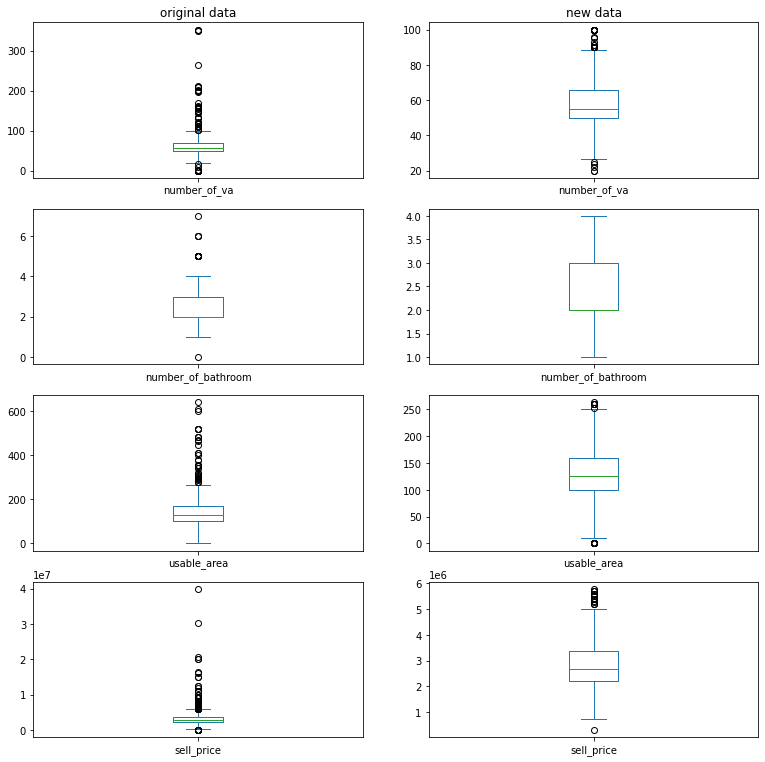

In [33]:
plt.figure(figsize=(13,20))
plt.subplot(6,2,1)
plt.title('original data')
H1['number_of_va'].plot.box()
plt.subplot(6,2,2)
plt.title('new data')
h1['number_of_va'].plot.box();

plt.subplot(6,2,3)
H1['number_of_bathroom'].plot.box()
plt.subplot(6,2,4)
h1['number_of_bathroom'].plot.box();

plt.subplot(6,2,5)
H1['usable_area'].plot.box()
plt.subplot(6,2,6)
h1['usable_area'].plot.box();

plt.subplot(6,2,7)
H1['sell_price'].plot.box()
plt.subplot(6,2,8)
h1['sell_price'].plot.box();

## บ้านมือ 2

In [34]:
H2 =H2[['id','latitude','longitude','renovate','number_of_rai','number_of_ngan','number_of_va','number_of_story','number_of_bedroom','number_of_bathroom','direction','furniture','usable_area','number_of_parking','sell_price']]

In [35]:
H2['second_hand']= '2'

<ipython-input-35-975a497ee29e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  H2['second_hand']= '2'


###  แก้ missing

In [36]:
H2.isnull().sum()

id                      0
latitude               22
longitude              22
renovate              211
number_of_rai           0
number_of_ngan          0
number_of_va            0
number_of_story       549
number_of_bedroom      27
number_of_bathroom      0
direction               0
furniture               0
usable_area           920
number_of_parking     215
sell_price              1
second_hand             0
dtype: int64

In [37]:
# แก้ missing ด้วย fill NA with 0
H2.fillna(0)

,id,latitude,longitude,renovate,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,number_of_parking,sell_price,second_hand
0,1.0,16.139321,102.631587,no,0.0,1.0,45.0,2.0,2.0,2.0,ไม่ระบุ,ไม่มี,244.00,2.0,390000.0,2
1,4.0,16.676156,102.917998,no,0.0,0.0,88.0,1.0,1.0,1.0,ไม่ระบุ,ไม่มี,164.00,3.0,820000.0,2
2,16.0,16.129358,102.530670,no,1.0,0.0,8.0,1.0,11.0,11.0,ไม่ระบุ,ไม่ระบุ,489.00,9.0,3260000.0,2
3,18.0,16.459052,102.806404,no,0.0,0.0,61.6,2.0,3.0,3.0,ไม่ระบุ,ไม่ระบุ,203.00,2.0,5000000.0,2
4,19.0,16.450000,102.800680,no,0.0,0.0,72.3,2.0,3.0,2.0,ไม่ระบุ,ไม่ระบุ,164.00,2.0,3500000.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,20460P,16.480110,102.574033,no,0.0,0.0,73.0,1.0,2.0,1.0,ไม่ระบุ,ไม่ระบุ,108.76,0.0,437400.0,2
1652,20462P,16.528551,102.411762,no,0.0,0.0,84.0,1.0,2.0,1.0,ไม่ระบุ,ไม่ระบุ,119.00,0.0,714600.0,2
1653,20463P,15.867444,102.482085,no,0.0,1.0,45.0,2.0,1.0,1.0,ไม่ระบุ,ไม่ระบุ,188.50,0.0,451000.0,2
1654,20466P,16.636912,102.105343,no,0.0,1.0,59.0,2.0,1.0,1.0,ไม่ระบุ,ไม่ระบุ,207.00,0.0,910000.0,2


###  แก้  value ให้ตรงกัน

In [38]:
# ลบ P จาก id
H2['id'] = H2['id'].apply(str).str.replace('P', '')

<ipython-input-38-b2c13593c80e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  H2['id'] = H2['id'].apply(str).str.replace('P', '')


In [50]:
# ลบ ของเมือง, ทางทิศ, ทิศ จาก ตะวันออกเฉียงใต้ของเมือง, ทางทิศตะวันออก, ทิศตะวันออก, ทิศเหนือ
H2['direction'] = H2['direction'].apply(str).str.replace('ของเมือง', '')
H2['direction'] = H2['direction'].apply(str).str.replace('ทางทิศ', '')
H2['direction'] = H2['direction'].apply(str).str.replace('ทิศ', '')

### one-hot-encoder 

In [61]:
#one-hot-encoder 
# ทำ columns 'renovate' เป็น dummy
H2_dummies = pd.get_dummies(H2,  columns=['renovate','direction','furniture'])
H2_dummies

,id,latitude,longitude,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,usable_area,...,direction_ตะวันออก,direction_ตะวันออกเฉียงเหนือ,direction_ตะวันออกเฉียงใต้,direction_เหนือ,direction_ใต้,direction_ไม่ระบุ,furniture_ตกแต่งครบ,furniture_มีบางส่วน,furniture_ไม่มี,furniture_ไม่ระบุ
0,1.0,16.139321,102.631587,0.0,1.0,45.0,2.0,2.0,2.0,244.00,...,0,0,0,0,0,1,0,0,1,0
1,4.0,16.676156,102.917998,0.0,0.0,88.0,1.0,1.0,1.0,164.00,...,0,0,0,0,0,1,0,0,1,0
2,16.0,16.129358,102.530670,1.0,0.0,8.0,1.0,11.0,11.0,489.00,...,0,0,0,0,0,1,0,0,0,1
3,18.0,16.459052,102.806404,0.0,0.0,61.6,2.0,3.0,3.0,203.00,...,0,0,0,0,0,1,0,0,0,1
4,19.0,16.450000,102.800680,0.0,0.0,72.3,2.0,3.0,2.0,164.00,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,20460,16.480110,102.574033,0.0,0.0,73.0,1.0,2.0,1.0,108.76,...,0,0,0,0,0,1,0,0,0,1
1652,20462,16.528551,102.411762,0.0,0.0,84.0,1.0,2.0,1.0,119.00,...,0,0,0,0,0,1,0,0,0,1
1653,20463,15.867444,102.482085,0.0,1.0,45.0,2.0,1.0,1.0,188.50,...,0,0,0,0,0,1,0,0,0,1
1654,20466,16.636912,102.105343,0.0,1.0,59.0,2.0,1.0,1.0,207.00,...,0,0,0,0,0,1,0,0,0,1


### แก้ outlier

In [64]:
outliers_H2 = find_outliers_IQR(H2_dummies)
print('number of outliers: '+ str(len(outliers)))
print('max outlier value: '+ str(outliers.max()))
print('min outlier value: '+ str(outliers.min()))

number of outliers: 754
max outlier value: id                          None
latitude              103.084464
longitude              103.07314
number_of_rai                NaN
number_of_ngan               NaN
number_of_va               353.0
number_of_story              NaN
number_of_bedroom            6.0
number_of_bathroom           7.0
direction                    NaN
furniture                    NaN
usable_area                640.0
number_of_parking            6.0
sell_price            40000000.0
second_hand                 None
dtype: object
min outlier value: id                         None
latitude              15.795787
longitude             15.730169
number_of_rai               NaN
number_of_ngan              NaN
number_of_va                0.0
number_of_story             NaN
number_of_bedroom           0.0
number_of_bathroom          0.0
direction                   NaN
furniture                   NaN
usable_area               279.0
number_of_parking           0.0
sell_price   

<ipython-input-29-c717c81b7c4c>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]


In [68]:
Q1 = H1[['number_of_va','number_of_bathroom','usable_area','sell_price']].quantile(0.25)
Q3 = H1[['number_of_va','number_of_bathroom','usable_area','sell_price']].quantile(0.75)
IQR = Q3 - Q1
h2 = H1[~((H1 < (Q1 - 1.5 * IQR)) |(H1 > (Q3 + 1.5 * IQR))).any(axis=1)]
print('Old Shape: ', H1.shape)
print('New Shape: ', h1.shape)

Old Shape:  (754, 15)
New Shape:  (642, 15)


<ipython-input-68-f6dc46fe051e>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  h2 = H1[~((H1 < (Q1 - 1.5 * IQR)) |(H1 > (Q3 + 1.5 * IQR))).any(axis=1)]


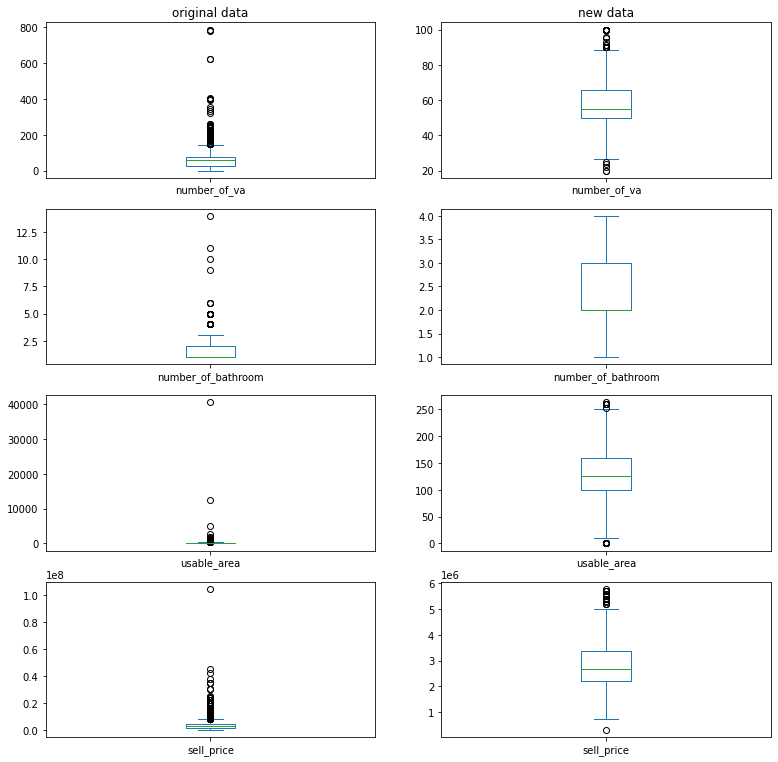

In [69]:
plt.figure(figsize=(13,20))
plt.subplot(6,2,1)
plt.title('original data')
H2['number_of_va'].plot.box()
plt.subplot(6,2,2)
plt.title('new data')
h2['number_of_va'].plot.box();

plt.subplot(6,2,3)
H2['number_of_bathroom'].plot.box()
plt.subplot(6,2,4)
h2['number_of_bathroom'].plot.box();

plt.subplot(6,2,5)
H2['usable_area'].plot.box()
plt.subplot(6,2,6)
h2['usable_area'].plot.box();

plt.subplot(6,2,7)
H2['sell_price'].plot.box()
plt.subplot(6,2,8)
h2['sell_price'].plot.box();